In [1]:
import pandas as pd
import numpy as np

from sklearn import preprocessing
import matplotlib.pyplot as plt

In [2]:
# Load the dataframe from a csv file
df_cf = pd.read_csv('Generated_CFs\cf_df_300_5_13.csv')

In [3]:
# Load the dataframe from a csv file
df = pd.read_csv('german_credit.csv')

# Cleaning

In [4]:
df.head()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   status                   1000 non-null   object
 1   duration                 1000 non-null   int64 
 2   credit_history           1000 non-null   object
 3   purpose                  1000 non-null   object
 4   amount                   1000 non-null   int64 
 5   savings                  1000 non-null   object
 6   employment_duration      1000 non-null   object
 7   installment_rate         1000 non-null   object
 8   personal_status_sex      1000 non-null   object
 9   other_debtors            1000 non-null   object
 10  present_residence        1000 non-null   object
 11  property                 1000 non-null   object
 12  age                      1000 non-null   int64 
 13  other_installment_plans  1000 non-null   object
 14  housing                  1000 non-null   

In [5]:
start_index = 1 + len(df)  # Calculate the starting index
new_index = range(start_index, start_index + len(df_cf))  # Create a new index starting from start_index
df_cf_reset = df_cf.copy()  # Create a copy of the DataFrame
df_cf_reset.index = new_index  # Set the new index
df_cf = df_cf_reset # Assign the new indexed DataFrame to the original DataFrame
df_cf.drop(columns=['Unnamed: 0'], inplace=True)  # Drop the 'Unnamed: 0' column

In [6]:
df.head()

,status,duration,credit_history,purpose,amount,savings,employment_duration,installment_rate,personal_status_sex,other_debtors,...,property,age,other_installment_plans,housing,number_credits,job,people_liable,telephone,foreign_worker,credit_risk
0,no checking account,18,all credits at this bank paid back duly,car (used),1049,unknown/no savings account,< 1 yr,< 20,female : non-single or male : single,none,...,car or other,21,none,for free,1,skilled employee/official,0 to 2,no,no,good
1,no checking account,9,all credits at this bank paid back duly,others,2799,unknown/no savings account,1 <= ... < 4 yrs,25 <= ... < 35,male : married/widowed,none,...,unknown / no property,36,none,for free,3-Feb,skilled employee/official,3 or more,no,no,good
2,... < 0 DM,12,no credits taken/all credits paid back duly,retraining,841,... < 100 DM,4 <= ... < 7 yrs,25 <= ... < 35,female : non-single or male : single,none,...,unknown / no property,23,none,for free,1,unskilled - resident,0 to 2,no,no,good
3,no checking account,12,all credits at this bank paid back duly,others,2122,unknown/no savings account,1 <= ... < 4 yrs,20 <= ... < 25,male : married/widowed,none,...,unknown / no property,39,none,for free,3-Feb,unskilled - resident,3 or more,no,yes,good
4,no checking account,12,all credits at this bank paid back duly,others,2171,unknown/no savings account,1 <= ... < 4 yrs,< 20,male : married/widowed,none,...,car or other,38,bank,rent,3-Feb,unskilled - resident,0 to 2,no,yes,good


In [7]:
df['status'] = df['status'].str.replace('... >= 200 DM / salary for at least 1 year', '0')
df['status'] = df['status'].str.replace('no checking account', '1')
df['status'] = df['status'].str.replace('... < 0 DM', '2')
df['status'] = df['status'].str.replace('0<= ... < 200 DM', '3')
df['installment_rate'] = df['installment_rate'].str.replace('< 20', '0')
df['installment_rate'] = df['installment_rate'].str.replace('20 <= ... < 25', '1')
df['installment_rate'] = df['installment_rate'].str.replace('25 <= ... < 35', '2')
df['installment_rate'] = df['installment_rate'].str.replace('>= 35', '3')
# Replace the values in the target column with string '0' and '1'.
df['employment_duration'] = df['employment_duration'].str.replace('< 1 yr', '1')  
df['employment_duration'] = df['employment_duration'].str.replace('unemployed' , '0') 
df['employment_duration'] = df['employment_duration'].str.replace('1 <= ... < 4 yrs', '2')
df['employment_duration'] = df['employment_duration'].str.replace('4 <= ... < 7 yrs', '3')
df['employment_duration'] = df['employment_duration'].str.replace('>= 7 yrs', '4')
df['present_residence'] = df['present_residence'].str.replace('>= 7 yrs', '0')
df['present_residence'] = df['present_residence'].str.replace('4 <= ... < 7 yrs', '1')
df['present_residence'] = df['present_residence'].str.replace('1 <= ... < 4 yrs', '2')
df['present_residence'] = df['present_residence'].str.replace('< 1 yr', '3')
df['installment_rate'] = df['installment_rate'].astype(int)
df['employment_duration'] = df['employment_duration'].astype(int)
df['present_residence'] = df['present_residence'].astype(int)
df['status'] = df['status'].astype(int)
# Replace the values in the target column with string '0' and '1'.
df['credit_risk'] = df['credit_risk'].str.replace('bad', '0')  
df['credit_risk'] = df['credit_risk'].str.replace('good', '1')   

# Convert to integer
df['credit_risk'] = df['credit_risk'].astype(int)

C:\Users\dideu\AppData\Local\Temp\ipykernel_12096\2857470016.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  df['status'] = df['status'].str.replace('... >= 200 DM / salary for at least 1 year', '0')
C:\Users\dideu\AppData\Local\Temp\ipykernel_12096\2857470016.py:3: FutureWarning: The default value of regex will change from True to False in a future version.
  df['status'] = df['status'].str.replace('... < 0 DM', '2')
C:\Users\dideu\AppData\Local\Temp\ipykernel_12096\2857470016.py:4: FutureWarning: The default value of regex will change from True to False in a future version.
  df['status'] = df['status'].str.replace('0<= ... < 200 DM', '3')
C:\Users\dideu\AppData\Local\Temp\ipykernel_12096\2857470016.py:6: FutureWarning: The default value of regex will change from True to False in a future version.
  df['installment_rate'] = df['installment_rate'].str.replace('20 <= ... < 25', '1')
C:\Users\dideu\AppData\Local\Temp\ipykernel_12096\

In [8]:
df.rename(columns={'credit_risk': 'credit'}, inplace=True)

In [9]:

df.dropna( inplace=True)

In [10]:
df_cf.head()

,status,duration,credit_history,purpose,amount,savings,employment_duration,installment_rate,personal_status_sex,other_debtors,...,property,age,other_installment_plans,housing,number_credits,job,people_liable,telephone,foreign_worker,credit
1001,2,12,no credits taken/all credits paid back duly,others,1995,... < 100 DM,1,0,female : non-single or male : single,none,...,building soc. savings agr./life insurance,27,none,rent,5-Apr,skilled employee/official,0 to 2,no,no,0
1002,2,12,delay in paying off in the past,others,3763,... < 100 DM,1,0,female : non-single or male : single,none,...,building soc. savings agr./life insurance,27,none,rent,1,skilled employee/official,0 to 2,no,no,0
1003,2,12,delay in paying off in the past,others,1995,... < 100 DM,1,0,male : married/widowed,none,...,building soc. savings agr./life insurance,27,none,own,5-Apr,skilled employee/official,0 to 2,no,no,0
1004,2,12,no credits taken/all credits paid back duly,others,1995,... < 100 DM,1,0,female : non-single or male : single,none,...,building soc. savings agr./life insurance,27,none,rent,1,skilled employee/official,0 to 2,no,no,0
1005,2,12,critical account/other credits elsewhere,others,1995,... < 100 DM,1,0,male : married/widowed,none,...,car or other,27,none,rent,1,skilled employee/official,0 to 2,no,no,0


# Graphs for features

In [11]:
def stacked_histogram(df_1, df_2, column_name):
    # Generate random colors
    num_colors = 2  # Number of colors needed (one for each DataFrame)
    colors = np.random.rand(num_colors, 3)  # Generate random RGB values
    
    # Grouping both DataFrames by 'marital-status' and counting the occurrences
    grouped_df_1 = df_1.groupby(column_name).size()
    grouped_df_2 = df_2.groupby(column_name).size()

    # Plotting the stacked histogram
    plt.figure(figsize=(10,5))
    p1 = plt.bar(grouped_df_1.index, grouped_df_1, color=colors[0], edgecolor='black')
    p2 = plt.bar(grouped_df_2.index, grouped_df_2, bottom=grouped_df_1, color= colors[1], edgecolor='black')
    plt.title('Stacked Distribution of {}'.format(column_name))
    plt.xlabel(column_name)
    plt.ylabel('Frequency')
    plt.xticks(rotation=45)  # Rotate x-labels for better readability if needed
    plt.legend((p1[0], p2[0]), ('Original', 'Counterfactual'))
    plt.show()

In [12]:
def stacked_numerical_histogram(df1, df2, column_name):
    # Generate random colors
    num_colors = 2  # Number of colors needed (one for each DataFrame)
    colors = np.random.rand(num_colors, 3)  # Generate random RGB values
    
    plt.figure(figsize=(10,6))
    plt.hist([df1[column_name], df2[column_name]], bins=20,  color=colors, edgecolor='black', stacked=True)
    plt.title('Stacked Distribution of {}'.format(column_name))
    plt.xlabel(column_name)
    plt.ylabel('Frequency')
    plt.legend(['Original', 'Counterfactual'])
    plt.show()

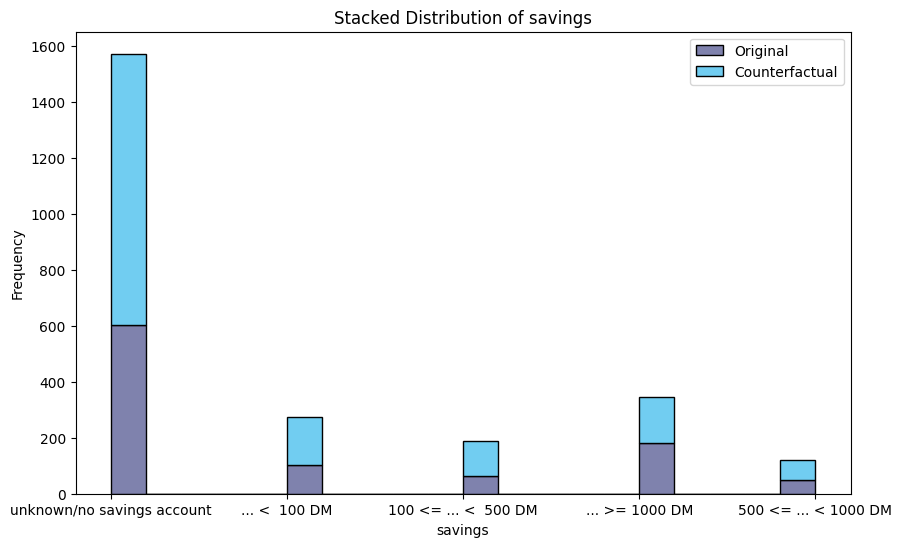

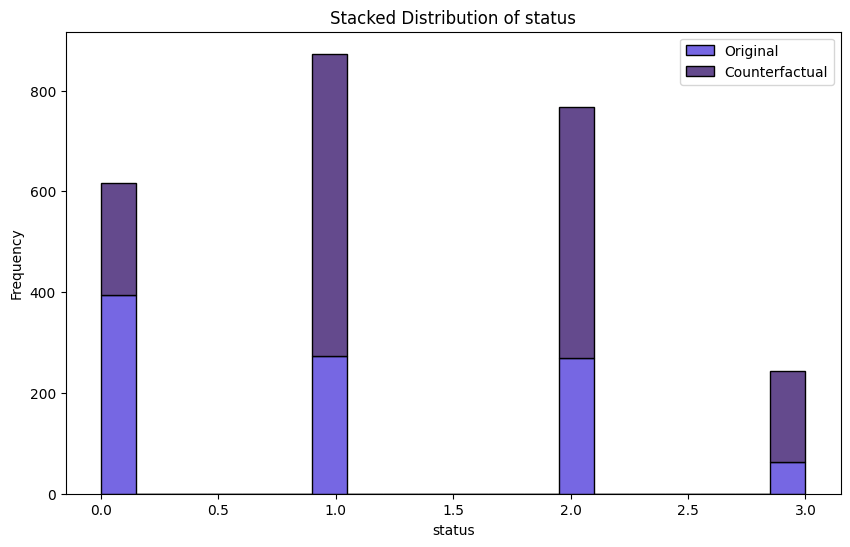

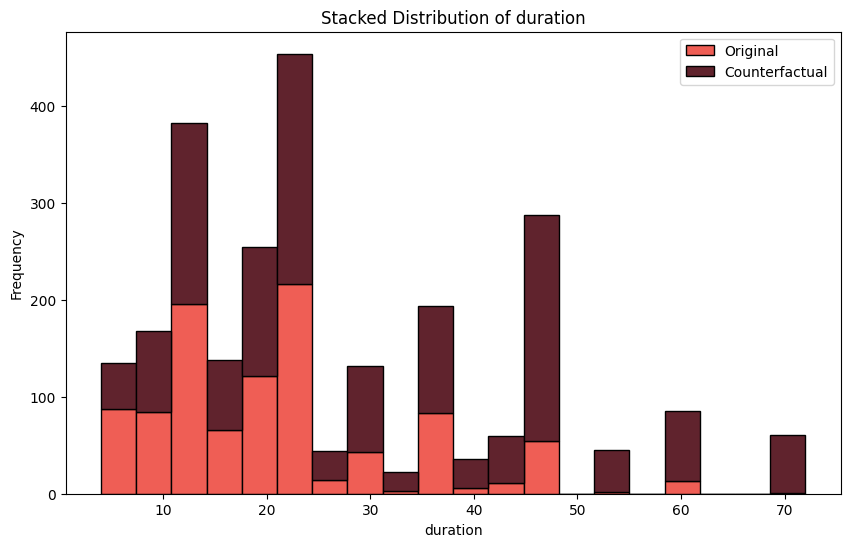

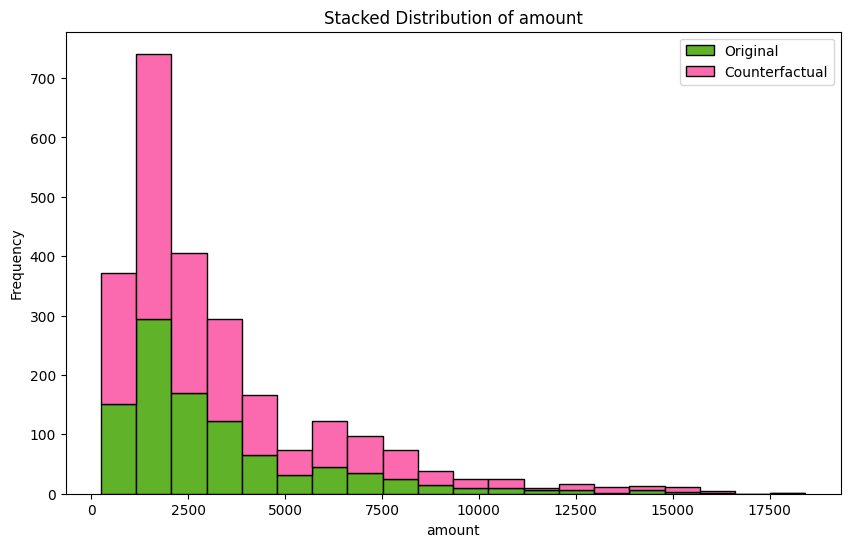

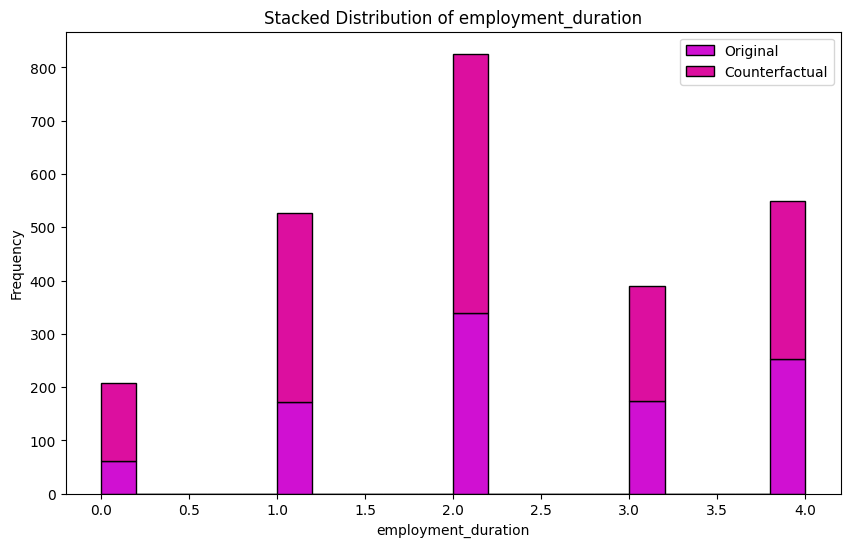

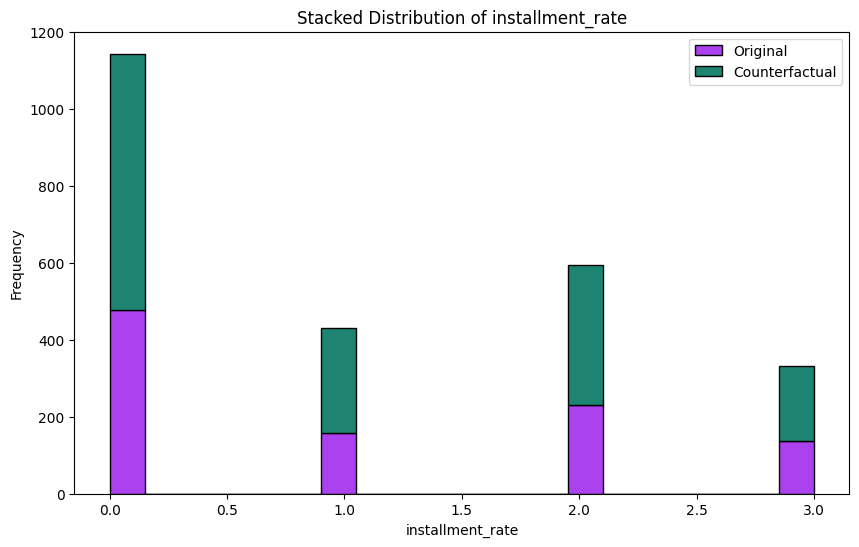

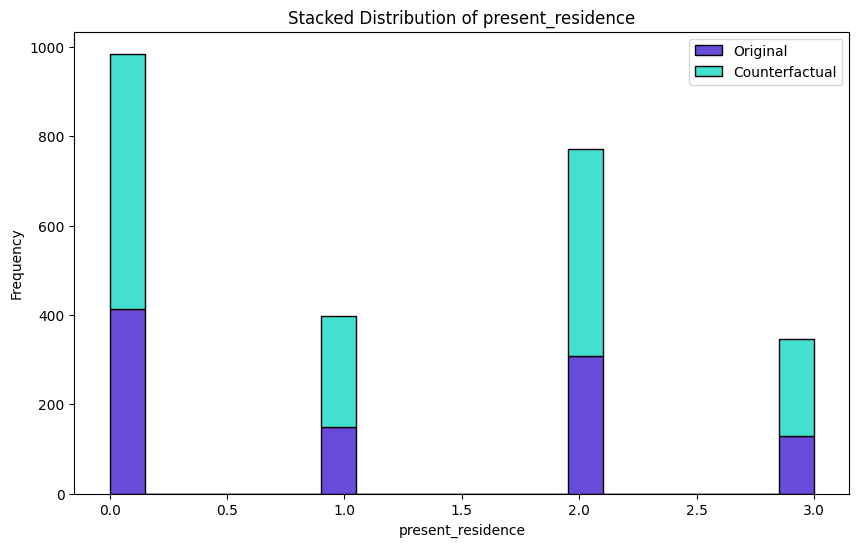

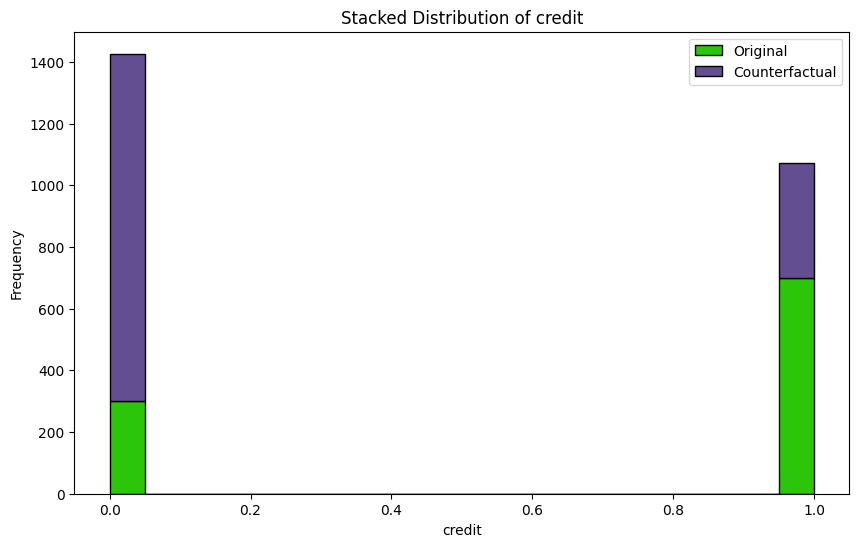

In [13]:
stacked_numerical_histogram(df, df_cf, 'savings')
stacked_numerical_histogram(df, df_cf, 'status')
stacked_numerical_histogram(df, df_cf, 'duration')
stacked_numerical_histogram(df, df_cf, 'amount')
stacked_numerical_histogram(df, df_cf, 'employment_duration')
stacked_numerical_histogram(df, df_cf, 'installment_rate')
stacked_numerical_histogram(df, df_cf, 'present_residence')
stacked_numerical_histogram(df, df_cf, 'credit')


In [14]:
df_cf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 1001 to 2500
Data columns (total 21 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   status                   1500 non-null   int64 
 1   duration                 1500 non-null   int64 
 2   credit_history           1500 non-null   object
 3   purpose                  1500 non-null   object
 4   amount                   1500 non-null   int64 
 5   savings                  1500 non-null   object
 6   employment_duration      1500 non-null   int64 
 7   installment_rate         1500 non-null   int64 
 8   personal_status_sex      1500 non-null   object
 9   other_debtors            1500 non-null   object
 10  present_residence        1500 non-null   int64 
 11  property                 1500 non-null   object
 12  age                      1500 non-null   int64 
 13  other_installment_plans  1500 non-null   object
 14  housing                  1500 non-nul

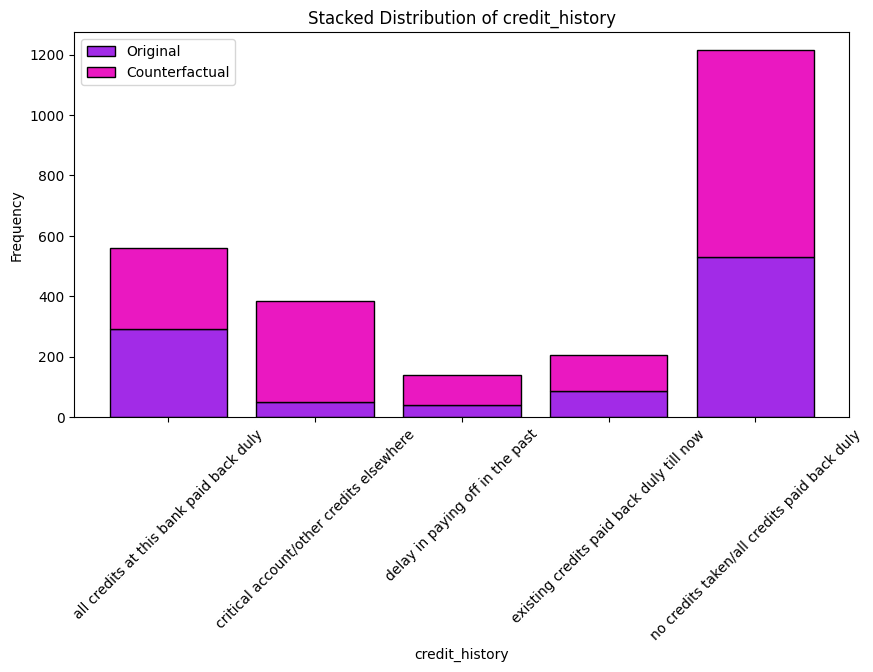

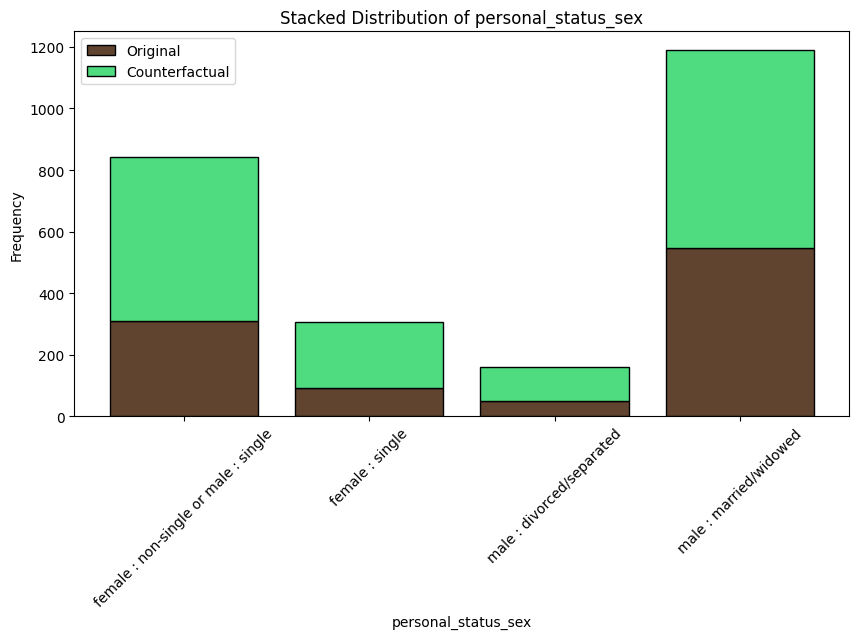

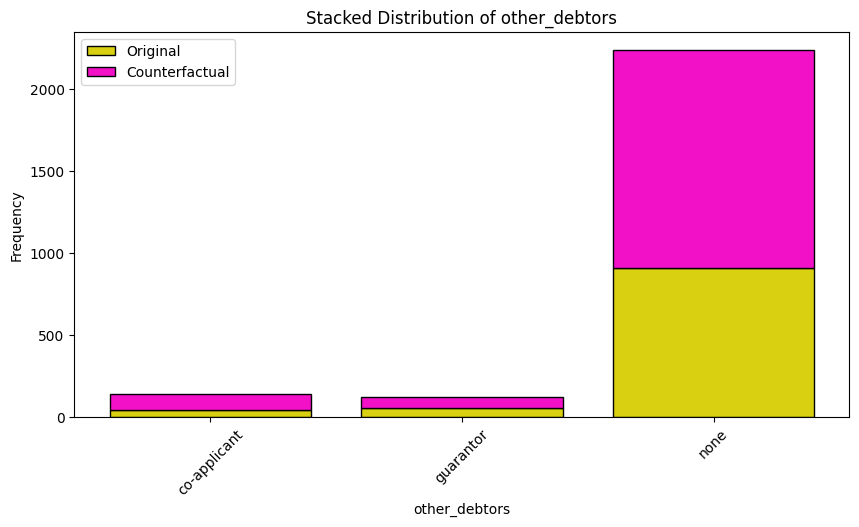

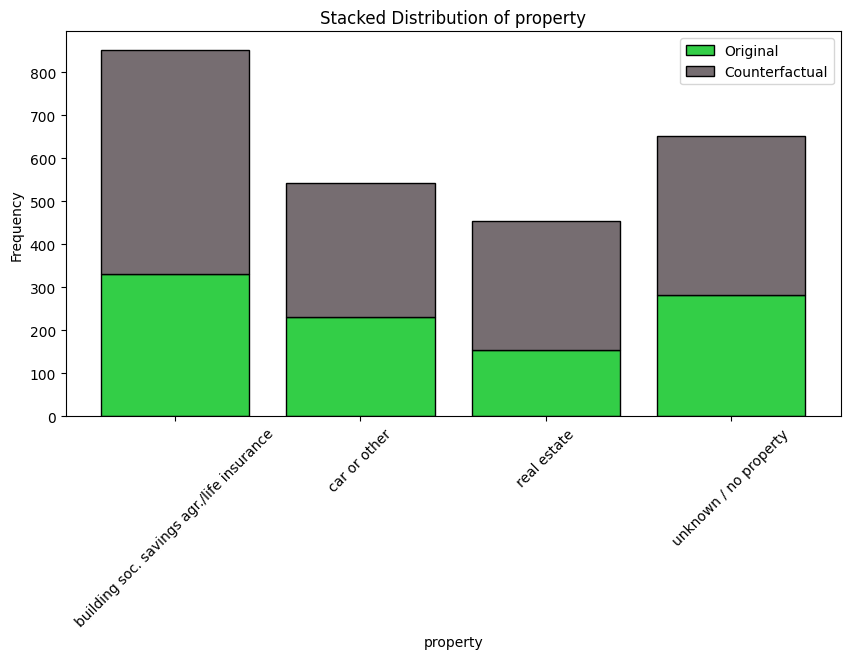

In [15]:
stacked_histogram(df, df_cf, 'credit_history')
stacked_histogram(df, df_cf, 'personal_status_sex')
stacked_histogram(df, df_cf, 'other_debtors')
stacked_histogram(df, df_cf, 'property')


# Graphs for model performance metrics

In [26]:
# Load the dataframe from a csv file
df_performance = pd.read_excel('Performance_metrics\model_perf_metrics_mean_of_iterations_only_with_cfs_10_20_30_40_50.xlsx')

In [19]:
df_performance.head()

,Unnamed: 0,Model,Iteration,Sample Size,CF Num,X_fit Size,F1 (%),F1 (%)_std,AUC (%),AUC (%)_std
0,0,RF_default_mean_of_iterations,5,0,0,700,0.856867,0.012988,0.696409,0.021716
1,1,LR_default_mean_of_iterations,5,0,0,700,0.827907,0.000000,0.689574,0.000000
2,2,LR_sample:100_cf:1_mean_of_5_iterations,5,100,1,800,0.833170,0.003340,0.694979,0.004185
3,3,LR_sample:100_cf:2_mean_of_5_iterations,5,100,2,900,0.825458,0.006017,0.685940,0.006388
4,4,LR_sample:200_cf:1_mean_of_5_iterations,5,200,1,900,0.832615,0.006406,0.694500,0.009814


In [23]:
def distrubution_plot(df, name, true_false_1, true_false_2):
    """
    This function plots the distribution of scores for a given model.

    Parameters:
    df (pandas.DataFrame): The DataFrame containing the model performance data.
    name (str): The list of the Scores that will be plotted.
    1st True False is a flag to determine if the data is mean of iterations or not.
    2nd True False is a flag to determine if the data is only CFs or CFs + original data.    
    """
    # Get the default values of the models
    lr_line = df[df['Model'].str.startswith('LR_default')][name].iloc[0]
    rf_line = df[df['Model'].str.startswith('RF_default')][name].iloc[0]
    df = df[(df['Model'] != 'RF_default') & (df['Model'] != 'LR_default')]
    df = df[(df['Model'] != 'RF_default_mean_of_iterations') & (df['Model'] != 'LR_default_mean_of_iterations')]

    # Get the sample size, CF Num and Iteration values    
    x = df['Sample Size'].unique()
    x_2 = df['CF Num'].unique()
    x_3 = df['Iteration'].unique()

    # Get the y values
    y = df[name]
    y_err = df[name+'_std']
    # combine x and x_2 for x-axis labels
    combined_x = [f"{i}_{j}_{k}" for i in x for j in x_2 for k in x_3]

    # plot lines
    plt.figure(figsize=(17, 9))
    
    
    # 1st True False is a flag to determine if the data is mean of iterations or not. True = mean of iterations
    # 2nd True False is a flag to determine if the data is only CFs or CFs + original data. True = only CFs
    if true_false_1 is True:
        plt.scatter(combined_x, y, color="blue")
        plt.errorbar(combined_x, y, yerr=y_err, fmt='o', color="blue",  capsize=6, label="{} Values".format(name))

        plt.axhline(y=rf_line, color='r', linestyle='--', label="Default_RF_Line_Mean_of_{}".format(x_3))  # Plot RF_line as a horizontal line
        plt.axhline(y=lr_line, color='green', linestyle='--', label="Default_LR_line_Mean_of_{}".format(x_3))  # Plot LR_line as a horizontal line

        plt.ylabel('{} score'.format(name))
        plt.xlabel('Sample Size- CF Num- Iteration')
        plt.legend(loc='upper right', bbox_to_anchor=(1.05, 1.155))
        plt.xticks(rotation=40)  # rotate x-axis labels for better visibility        
        
        if true_false_2 is True:
            plt.title('Distribution of {} Scores of Models\n Trained on CFs\nSample: {} - CF: {}\n Mean of {} iterations'.format(name,x, x_2, x_3))
            plt.savefig(f"Plots/Plot_of_{name}_Score_onlyCFs_Sample_{x}_CF_{x_2}_mean_of_{x_3}_iterations.svg", format='svg')    
        else:
            plt.title('Distribution of {} Scores \n Trained on CFs + Original set\n Sample: {} - CF: {}\n Mean of {} iterations'.format(name,x, x_2, x_3))
            plt.savefig(f"Plots/Plot_of_{name}_Score_Sample_{x}_CF_{x_2}_mean_of_{x_3}_iterations.svg", format='svg')    
    else:
        plt.plot(combined_x, y, 'o-', color="blue", label="{} Values".format(name))
        
        plt.axhline(y=rf_line, color='r', linestyle='--', label="Default_RF_Line")  # Plot RF_line as a horizontal line
        plt.axhline(y=lr_line, color='green', linestyle='--', label="Default_LR_line")  # Plot LR_line as a horizontal line

        plt.ylabel('{} score'.format(name))
        plt.xlabel('Sample Size- CF Num- Iteration')
        plt.legend(loc='upper right', bbox_to_anchor=(1.05, 1.155))
        plt.xticks(rotation=40)  # rotate x-axis labels for better visibility    

        if true_false_2 is True:
            plt.title('Distribution of {} Scores of Models \nTrained on CFs\nSample: {} - CF: {}'.format(name, x, x_2))
            plt.savefig(f"Plots/Plot_of_{name}_Score_onlyCFs_Sample_{x}_CF_{x_2}.svg", format='svg')
        else:    
            plt.title('Distribution of {} Scores \n Trained on CFs + Original set\n Sample: {} - CF: {}'.format(name, x, x_2))
            plt.savefig(f"Plots/Plot_of_{name}_Score_Sample_{x}_CF_{x_2}.svg", format='svg')
            
    #plt.show()

In [ ]:
distrubution_plot(df_performance, 'AUC (%)', True, True)

In [ ]:
# Drop row at position 'row_position'
df_performance = df_performance.drop(df_performance.index[32])

In [ ]:
df_performance.head()

,Unnamed: 0,Model,Iteration,Sample Size,CF Num,Total CF Num,Precision (%),F1 (%),AUC(%),F1_average(%),F1_std(%),AUC_average(%),AUC_std(%)
2,2,LR _1_iterations_sample:5400_cf:1,1,5400,1,5400,0.771577,0.355259,0.604085,0.0,0.0,0.0,0.0
3,3,LR _2_iterations_sample:5400_cf:1,2,5400,1,5400,0.684316,0.421798,0.629182,0.0,0.0,0.0,0.0
4,4,LR _3_iterations_sample:5400_cf:1,3,5400,1,5400,0.771802,0.361840,0.606609,0.0,0.0,0.0,0.0
5,5,LR _4_iterations_sample:5400_cf:1,4,5400,1,5400,0.765818,0.358835,0.605314,0.0,0.0,0.0,0.0
6,6,LR _5_iterations_sample:5400_cf:1,5,5400,1,5400,0.766764,0.358677,0.605276,0.0,0.0,0.0,0.0


In [ ]:
def stacked_histogram(df_1, df_2, column_name):
    # Generate random colors
    num_colors = 2  # Number of colors needed (one for each DataFrame)
    colors = np.random.rand(num_colors, 3)  # Generate random RGB values
    
    # Grouping both DataFrames by 'marital-status' and counting the occurrences
    grouped_df_1 = df_1.groupby(column_name).size()
    grouped_df_2 = df_2.groupby(column_name).size()

    # Plotting the stacked histogram
    plt.figure(figsize=(10,5))
    p1 = plt.bar(grouped_df_1.index, grouped_df_1, color=colors[0], edgecolor='black')
    p2 = plt.bar(grouped_df_2.index, grouped_df_2, bottom=grouped_df_1, color= colors[1], edgecolor='black')
    plt.title('Stacked Distribution of {}'.format(column_name))
    plt.xlabel(column_name)
    plt.ylabel('Frequency')
    plt.xticks(rotation=45)  # Rotate x-labels for better readability if needed
    plt.legend((p1[0], p2[0]), ('Original', 'Counterfactual'))
    plt.show()

In [ ]:
def distrubution_plot(df, name):
    lr_line = df[df['Model'] == 'LR default'][name].iloc[0]
    rf_line = df[df['Model'] == 'RF default'][name].iloc[0]
    df = df[(df['Model'] != 'RF default') & (df['Model'] != 'LR default')]
        
    x = df['Sample Size'].unique()
    x_2 = df['CF Num'].unique()
    x_3 = df['Iteration'].unique()

    y = df[name]

    # combine x and x_2 for x-axis labels
    combined_x = [f"{i}-{j}-{k}" for i in x for j in x_2 for k in x_3]

    # plot lines
    plt.figure(figsize=(20,8))
    plt.plot(combined_x, y, label="{} Values".format(name))
    plt.axhline(y=lr_line, color='r', linestyle='--', label="default_lr_line")  # Plot lr_line as a horizontal line
    plt.axhline(y=rf_line, color='green', linestyle='--', label="default_rf_line")  # Plot lr_line as a horizontal line

    plt.title('Distribution of {}'.format(name))
    plt.xlabel('Sample Size- CF Num- Iteration')
    plt.legend()
    plt.xticks(rotation=45)  # rotate x-axis labels for better visibility
    plt.show()


In [20]:
distrubution_plot(df_performance, 'F1 (%)')

NameError: name 'distrubution_plot' is not defined